# Import the libraries
____
**created by Nadhifa Sofia | 19/448721/PPA/05804**
____
Exploratory Data Analysis atau (EDA) adalah memahami kumpulan data dengan meringkas karakteristik utama mereka yang sering merencanakannya secara visual. Langkah ini sangat penting terutama ketika kita sampai pada pemodelan data untuk menerapkan pembelajaran Mesin.
____
**a. Tujuan dari analisis yang akan dilakukan**
____   
   Untuk memahami kumpulan data [covid-19](http://covid19.gamabox.id/analysis#) per tanggal 29 April 2020

In [1]:
# Import library yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

# Load the data

Datasetnya terdapat [disini](https://github.com/dhifaaans/uas_abd/blob/master/Form-RC19.csv)
____
Memuat data ke dalam pandas dataframe tentu saja merupakan salah satu langkah terpenting dalam EDA, karena kita dapat melihat bahwa nilai dari kumpulan data dipisahkan oleh koma. Jadi yang harus kita lakukan hanyalah membaca CSV ke dalam kerangka data dan kerangka data panda melakukan pekerjaan untuk kita.

In [2]:
df = pd.read_csv('Form-RC19.csv')
# Menampilkan 5 data teratas
df.head()

,t5,Provinsi,ODP Proses/Pemantauan,ODP selesai,ODP Total,PDP Proses/Rawat Inap/Rawat Jalan,PDP Negatif/sembuh/selesai,PDP Meninggal,PDP Total,Positif Meninggal,Positif Sembuh,Positif dirawat,Positif Total
0,1.0,Aceh,316,1203,1519,13,69,1.0,83,1,4,4,9
1,2.0,Sumatera Utara,2970,0,2970,88,0,0.0,88,0,0,30,30
2,3.0,Sumatera Barat,1570,2496,4066,15,80,0.0,95,1,4,21,26
3,4.0,Riau,4434,0,4434,72,0,0.0,72,0,0,1,1
4,5.0,Kepulauan Riau,597,1752,2394,67,153,4.0,222,7,5,36,48


In [4]:
# Menampilkan 5 data terbawah
df.tail() 

,t5,Provinsi,ODP Proses/Pemantauan,ODP selesai,ODP Total,PDP Proses/Rawat Inap/Rawat Jalan,PDP Negatif/sembuh/selesai,PDP Meninggal,PDP Total,Positif Meninggal,Positif Sembuh,Positif dirawat,Positif Total
30,31.0,Maluku Utara,580,86,2693,69,85,0.0,184,0,10,40,64
31,32.0,Maluku,244,45,1106,36,0,0.0,120,0,26,44,77
32,33.0,Papua,3423,2429,8281,98,0,0.0,98,5,38,97,142
33,34.0,Papua Barat,809,264,1073,46,29,NaN,75,0,0,16,16
34,NaN,Total,52122,60181,124754,4798,7618,343.0,13573,534,695,4922,6370


# Check the data types

Di sini kita memeriksa datatypes, terkadang perlu untuk mengkonversi string itu ke data integer hanya maka kita dapat memplot data melalui grafik . Di sini, dalam hal ini, data sudah bagus sehingga tidak perlu khawatir.

In [5]:
# Checking the data type
df.dtypes

t5                                    float64
Provinsi                               object
ODP Proses/Pemantauan                   int64
ODP selesai                             int64
ODP Total                               int64
PDP Proses/Rawat Inap/Rawat Jalan       int64
PDP Negatif/sembuh/selesai              int64
PDP Meninggal                         float64
PDP Total                               int64
Positif Meninggal                       int64
Positif Sembuh                          int64
Positif dirawat                         int64
Positif Total                           int64
dtype: object

# Drop irrelevant columns

**b. Bagaimana pengolahan/penyiapan data yang dilakukan**
____
Langkah ini tentu diperlukan di setiap EDA karena kadang-kadang akan ada banyak kolom yang tidak pernah kita gunakan dalam studi kasus. Dalam hal ini, kolom seperti 't5' tidak terlalu digunakan, jadi saya hapus dulu.

In [6]:
# Menghapus kolom yang tidak digunakan 
df = df.drop(['t5'], axis=1)
df.head()

,Provinsi,ODP Proses/Pemantauan,ODP selesai,ODP Total,PDP Proses/Rawat Inap/Rawat Jalan,PDP Negatif/sembuh/selesai,PDP Meninggal,PDP Total,Positif Meninggal,Positif Sembuh,Positif dirawat,Positif Total
0,Aceh,316,1203,1519,13,69,1.0,83,1,4,4,9
1,Sumatera Utara,2970,0,2970,88,0,0.0,88,0,0,30,30
2,Sumatera Barat,1570,2496,4066,15,80,0.0,95,1,4,21,26
3,Riau,4434,0,4434,72,0,0.0,72,0,0,1,1
4,Kepulauan Riau,597,1752,2394,67,153,4.0,222,7,5,36,48


# Check duplicates
**c. Bagaimana implementasi algoritma yang dipilih dan dijalankan**

In [7]:
df.shape

(35, 12)

In [8]:
# Mengecheck apakah terdapat duplikasi antar baris
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


In [9]:
# Menghitung total baris tiap kolom
df.count()

Provinsi                              35
ODP Proses/Pemantauan                 35
ODP selesai                           35
ODP Total                             35
PDP Proses/Rawat Inap/Rawat Jalan     35
PDP Negatif/sembuh/selesai            35
PDP Meninggal                         34
PDP Total                             35
Positif Meninggal                     35
Positif Sembuh                        35
Positif dirawat                       35
Positif Total                         35
dtype: int64

# Check missing values
Dalam kasus ini, missing values terdapat pada 'PDP Total' untuk Prov. Papua Barat, oleh karena itu saya replace menjadi 0.

In [10]:
# Mencari missing values
print(df.isnull().sum())

Provinsi                              0
ODP Proses/Pemantauan                 0
ODP selesai                           0
ODP Total                             0
PDP Proses/Rawat Inap/Rawat Jalan     0
PDP Negatif/sembuh/selesai            0
PDP Meninggal                         1
PDP Total                             0
Positif Meninggal                     0
Positif Sembuh                        0
Positif dirawat                       0
Positif Total                         0
dtype: int64


In [11]:
# Menganti missing values
df['PDP Meninggal'].fillna( method ='ffill', inplace = True) 

In [12]:
# Mengecek kembali apakah masih ada missing values
print(df.isnull().sum())

Provinsi                              0
ODP Proses/Pemantauan                 0
ODP selesai                           0
ODP Total                             0
PDP Proses/Rawat Inap/Rawat Jalan     0
PDP Negatif/sembuh/selesai            0
PDP Meninggal                         0
PDP Total                             0
Positif Meninggal                     0
Positif Sembuh                        0
Positif dirawat                       0
Positif Total                         0
dtype: int64


# Detecting outliers
Outliers adalah titik atau kumpulan poin yang berbeda dari poin lainnya. Terkadang mereka bisa sangat tinggi atau sangat rendah. Sering kali ide yang baik untuk mendeteksi dan menghapus pencilan. Karena outlier adalah salah satu faktor untuk menghasilkan model yang kurang akurat, maka ide yang baik adalah untuk menghapusnya. Deteksi outlier dan menghilangkan yang akan saya lakukan disebut teknik skor IQR. Seringkali outlier dapat dilihat dengan visualisasi menggunakan plot kotak.

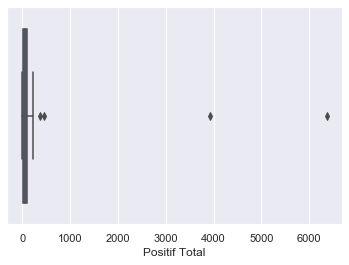

In [13]:
sns.boxplot(x=df['Positif Total'])

In [14]:
# Mencari nilai IQR pada kolom tertentu
q1 = df['Positif Total'].quantile(.25)
q2 = df['Positif Total'].quantile(.5)
q3 = df['Positif Total'].quantile(.75)
mask = df['Positif Total'].between(q1, q2, inclusive=True)
iqr = df.loc[mask, 'Positif Total']

In [15]:
print(iqr)

1     30
2     26
4     48
7     13
8     10
9     14
16    10
24    16
33    16
Name: Positif Total, dtype: int64


In [16]:
q1 = df.quantile(.25)
q2 = df.quantile(.5)
q3 = df.quantile(.75)
iqr = q3 - q1
print(iqr)

ODP Proses/Pemantauan                 1699.0
ODP selesai                           2462.5
ODP Total                             3637.5
PDP Proses/Rawat Inap/Rawat Jalan      154.0
PDP Negatif/sembuh/selesai             101.0
PDP Meninggal                            0.5
PDP Total                              391.0
Positif Meninggal                        5.0
Positif Sembuh                          13.0
Positif dirawat                         83.5
Positif Total                           95.5
dtype: float64


In [17]:
df.shape

(35, 12)

In [24]:
df.describe()

,ODP Proses/Pemantauan,ODP selesai,ODP Total,PDP Proses/Rawat Inap/Rawat Jalan,PDP Negatif/sembuh/selesai,PDP Meninggal,PDP Total,Positif Meninggal,Positif Sembuh,Positif dirawat,Positif Total
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2978.400000,3438.914286,7128.800000,274.171429,435.314286,19.600000,775.600000,30.514286,39.714286,281.257143,364.000000
std,8828.453636,10620.595387,21157.456833,819.180383,1473.413539,65.259752,2429.314805,108.558840,126.880808,972.353311,1234.822135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,276.000000,0.000000,1019.000000,14.000000,0.000000,0.000000,27.000000,0.000000,0.000000,4.500000,9.500000
50%,808.000000,140.000000,2394.000000,46.000000,9.000000,0.000000,95.000000,1.000000,2.000000,30.000000,48.000000
75%,1975.000000,2462.500000,4656.500000,168.000000,101.000000,0.500000,418.000000,5.000000,13.000000,88.000000,105.000000
max,52122.000000,60181.000000,124754.000000,4798.000000,7618.000000,343.000000,13573.000000,534.000000,695.000000,4922.000000,6370.000000


# Visualization
**d. Jelaskan insight hasil data analisis yang dihasilkan**
___
Heat Maps adalah jenis plot yang diperlukan ketika kita perlu menemukan variabel dependen. Salah satu cara terbaik untuk menemukan hubungan antara fitur dapat dilakukan dengan menggunakan heat maps. Pada peta panas di bawah ini kita tahu bahwa fitur harga terutama tergantung pada ODP Proses, ODP Selesai, dsb.
- Insight: Dengan legend warna yang semakin **hijau**, berarti antar fitur sangat **tinggi** tingkat korelasinya.
- Insight: Dengan legend warna yang semakin **coklat**, berarti antar fitur sangat **rendah** tingkat korelasinya.

___
**e. Berikan penjelasan yang dapat dinarasikan untuk dipahami masyarakat awal bisa dalam bentuk naratif atau visualisasi**
___
Setelah kita mengetahui gambaran umum dari data/tabel yang kita miliki, kini saatnya kita beralih untuk pengolahan lebih jauh. Muncul pertanyaan, data mana saja yang butuh untuk diolah? Dari 11 features yang tersedia dalam tabel data covid-19 ini, data manakah yang paling memberikan pengaruh terhadap data features lainnya.

,ODP Proses/Pemantauan,ODP selesai,ODP Total,PDP Proses/Rawat Inap/Rawat Jalan,PDP Negatif/sembuh/selesai,PDP Meninggal,PDP Total,Positif Meninggal,Positif Sembuh,Positif dirawat,Positif Total
ODP Proses/Pemantauan,1.000000,0.950029,0.986181,0.970613,0.827979,0.909946,0.907743,0.778710,0.874489,0.797446,0.813834
ODP selesai,0.950029,1.000000,0.985730,0.952457,0.874916,0.959318,0.930961,0.826443,0.902118,0.834255,0.848688
ODP Total,0.986181,0.985730,1.000000,0.973998,0.863977,0.941306,0.933564,0.815595,0.903582,0.829927,0.846559
PDP Proses/Rawat Inap/Rawat Jalan,0.970613,0.952457,0.973998,1.000000,0.920913,0.890786,0.973033,0.888101,0.949523,0.902513,0.913845
PDP Negatif/sembuh/selesai,0.827979,0.874916,0.863977,0.920913,1.000000,0.780419,0.984560,0.994183,0.984182,0.993642,0.994966
PDP Meninggal,0.909946,0.959318,0.941306,0.890786,0.780419,1.000000,0.851737,0.725933,0.830030,0.726346,0.745591
PDP Total,0.907743,0.930961,0.933564,0.973033,0.984560,0.851737,1.000000,0.965988,0.988787,0.971340,0.978293
Positif Meninggal,0.778710,0.826443,0.815595,0.888101,0.994183,0.725933,0.965988,1.000000,0.972239,0.997622,0.996273
Positif Sembuh,0.874489,0.902118,0.903582,0.949523,0.984182,0.830030,0.988787,0.972239,1.000000,0.977959,0.983916
Positif dirawat,0.797446,0.834255,0.829927,0.902513,0.993642,0.726346,0.971340,0.997622,0.977959,1.000000,0.999122


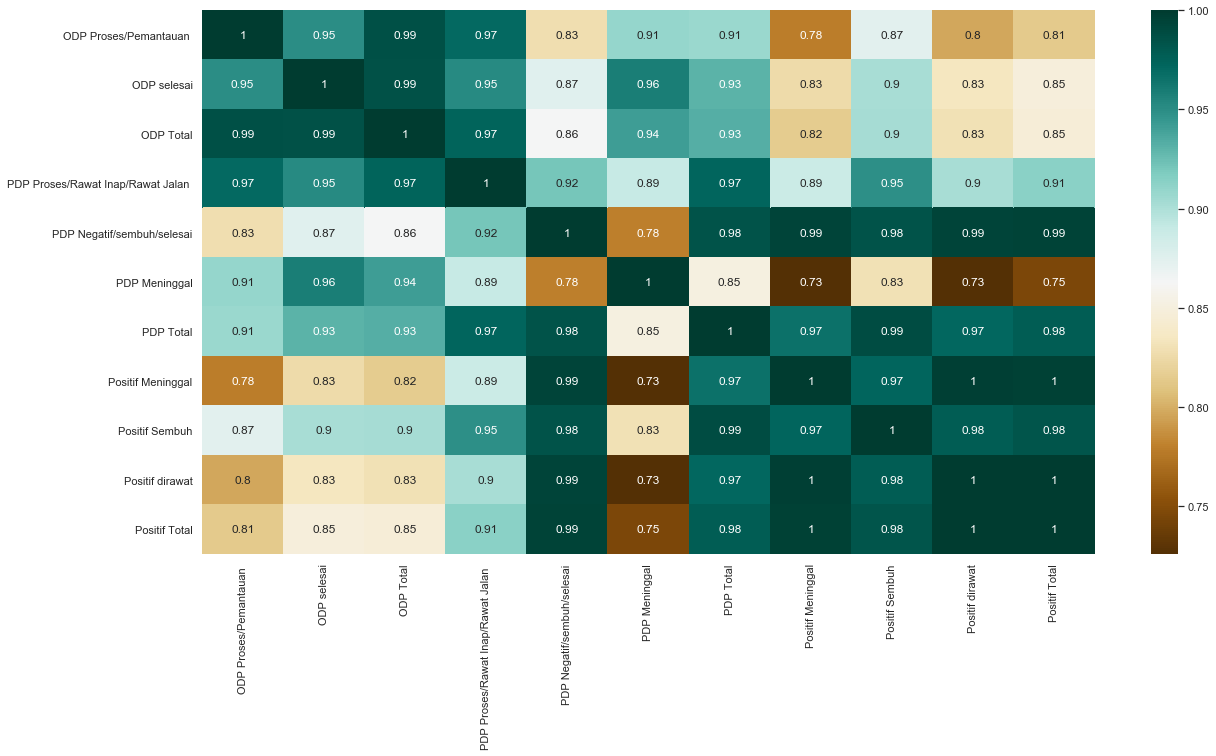

In [18]:
# Menemukan hubungan antar variabel
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

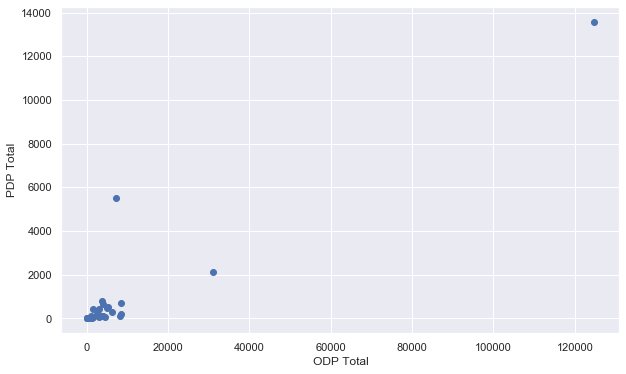

In [19]:
# Contoh scatter plot untuk fitur Jumlah PDP dan Jumlah ODP
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['ODP Total'], df['PDP Total'])
ax.set_xlabel('ODP Total')
ax.set_ylabel('PDP Total')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d68c0f0>,
      dtype=object)

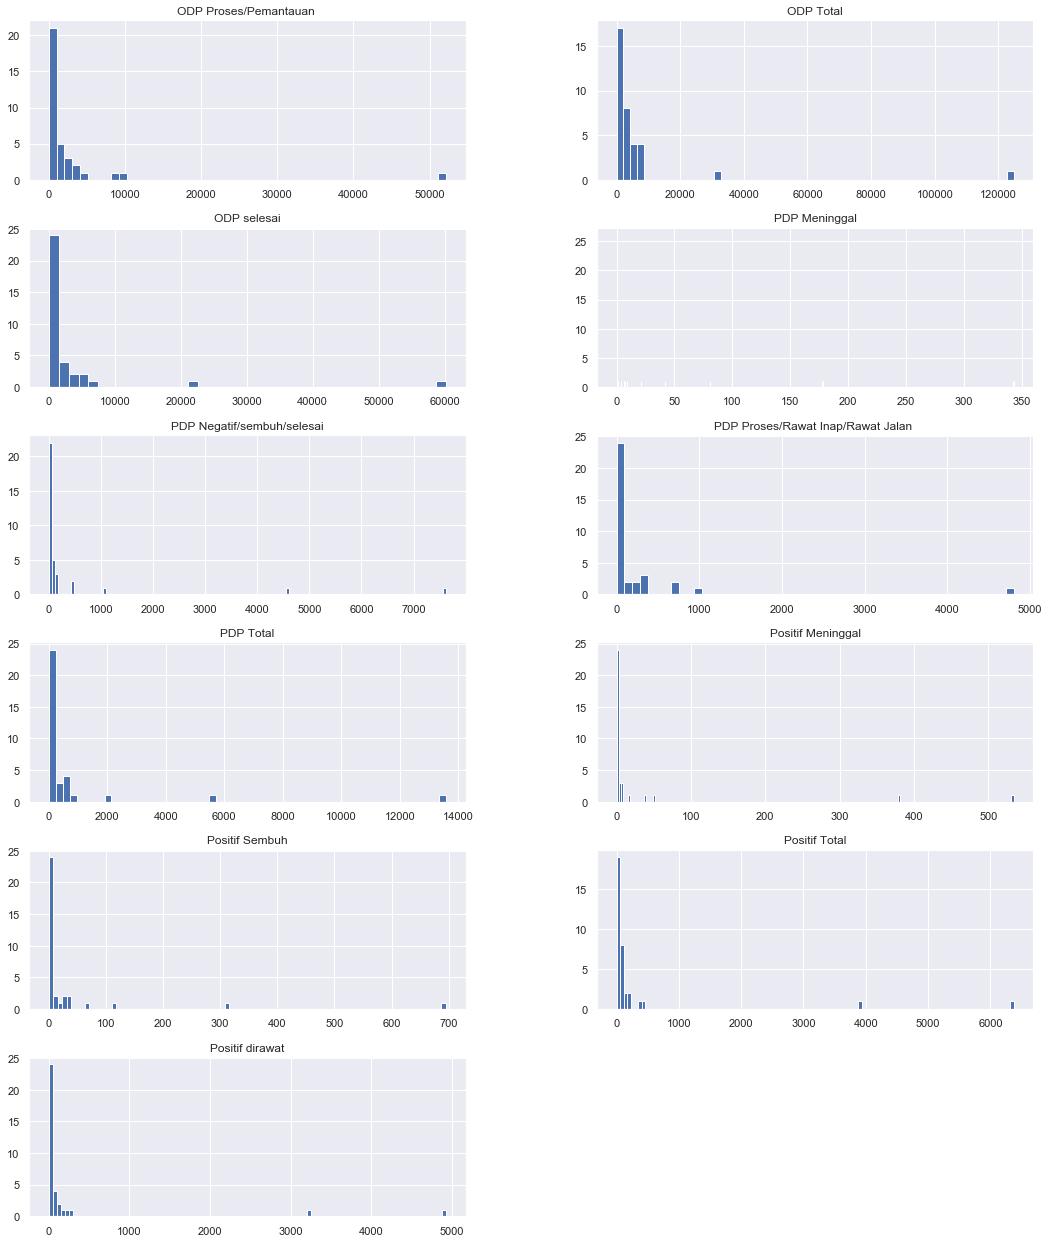

In [31]:
# Membuat histogram
df.hist(bins='auto', figsize=(18, 22), layout=(6, 2))